## 1 A Brief matplotlib API Primer

**Every time displaying a plot (either by plt.show() or by %matplotlib inline) will reset the plot**

In [ ]:
# It's not necessary if you call figure object to display plots
%matplotlib inline

Using following command to switch back to system's default

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [4]:
import pandas as pd

In [14]:
import seaborn as sns

In [40]:
plt.rc('figure', figsize=(10, 6))

In [3]:
data = np.arange(10)

In [4]:
plt.plot(data)

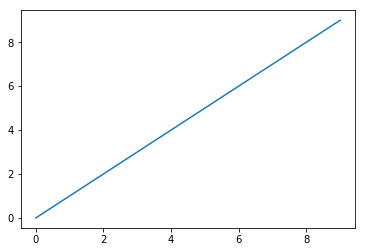

In [5]:
plt.show()

### 1.1 Figures and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure`

In [21]:
fig = plt.figure(figsize=(10, 8))

You can't make a plot with a blank figure. You have to create one or more subplots using add_subplot

In [22]:
# Plots are reset after each cell is evaluated
# For more complex plots, must put all of plotting commands in a single cell
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

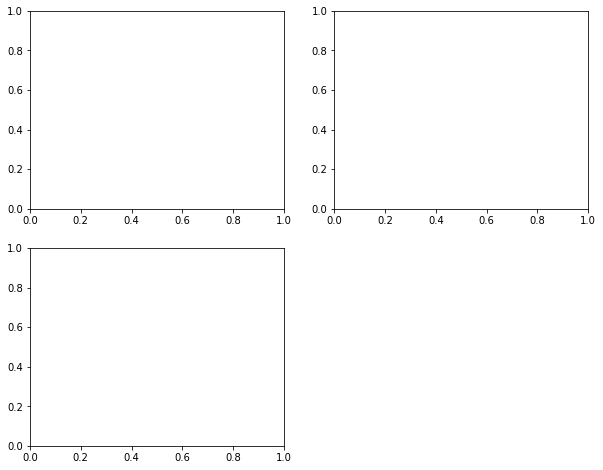

In [23]:
fig  # calling fig object by itself will not reset plot

The passed arguments mean that the figure should be 2 * 2 (4 subplots), and we're select the nth subplot.

When issue a plotting command, matplotlib draws on the last figure and subplot used (creating one if necessary)

In [24]:
ax3.plot(np.random.randn(50).cumsum(), 'k--') 

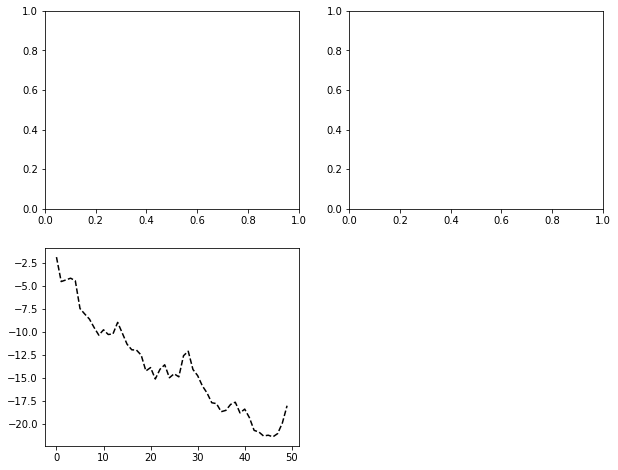

In [25]:
fig

The object returned by `fig.add_subplot` are AxesSubplot objects, on which you can directly plot on the other empty subplots by alling each ones's instance method

In [26]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

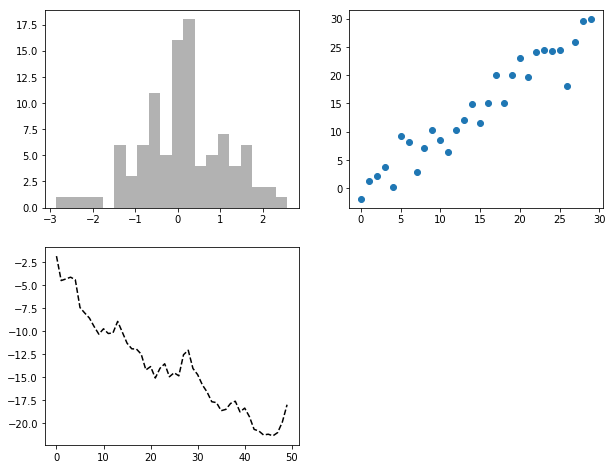

In [27]:
plt.show()

`plt.subplots` function creates a new figure and returns a NumPy array containing the created subplot objects

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes[0, 1].plot(np.random.randn(30).cumsum())

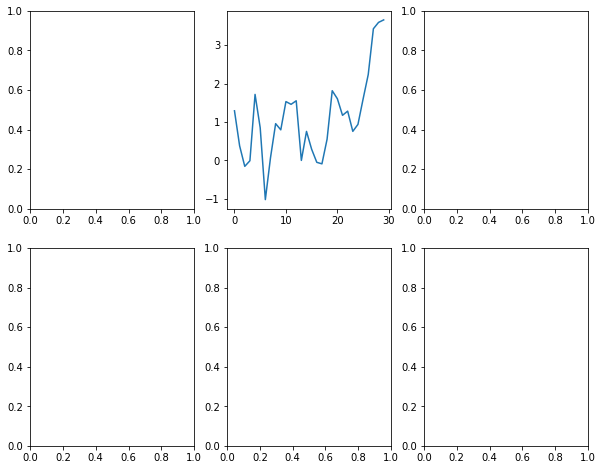

In [32]:
plt.show()

 Using the `subplots_adjust` method on `Figure` objects to changed the spacing around subplots, which is also available as a top-level function

`wspace` and `hspace` controls the percent of figure width and height to use as spacing between subplots

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

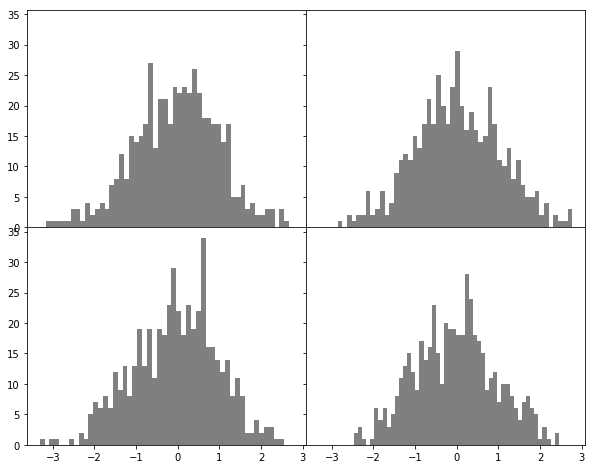

In [34]:
plt.show()

### 1.2 Colors, Markers, and Line Style

Indicating color and line style

```
ax.plot(x, y, 'g--')
    is equivalent with
ax.plot(x, y, linestyle='--', color='g')
```

In [35]:
plt.plot(np.random.randn(30).cumsum(), 'g--',
         np.random.randn(30).cumsum(), 'r-')

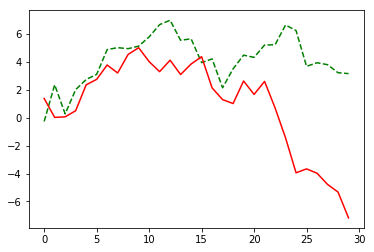

In [36]:
plt.show()

Hex code (e.g. '#CECECE') can also be used

Line plots can have `markers` to highlight the actual data points

In [37]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

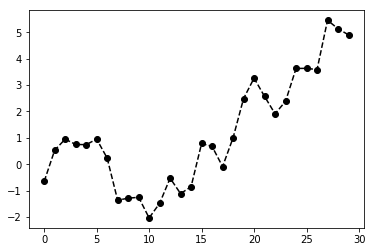

In [38]:
plt.show()

It's equivalent with:
```
plt.plot(np.random.randn(30).cumsum, color='k', linestyle='--',
         marker='o')
```

Using `drawstyle` option to alter interpolate style

In [43]:
data = np.random.randn(30).cumsum()

In [44]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

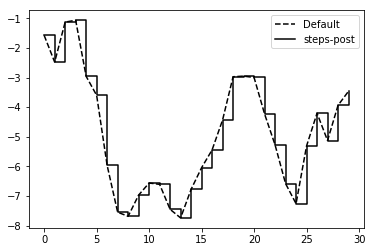

In [46]:
plt.show()

### 1.3 Ticks, Labels, and Legends

Two main ways to do most kinds of plot decorations:
1. Using procedural `pyplot` interface
    - Called with no arguments returns the current parameter value (e.g., plt.xlim())
    - Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]))

2. Object-oriented native matplotlib API
    - Each of pyplot interface methods corresponds to two methods on the subplot itself. (e.g. ax.get_xlim and ax.set_xlim)

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

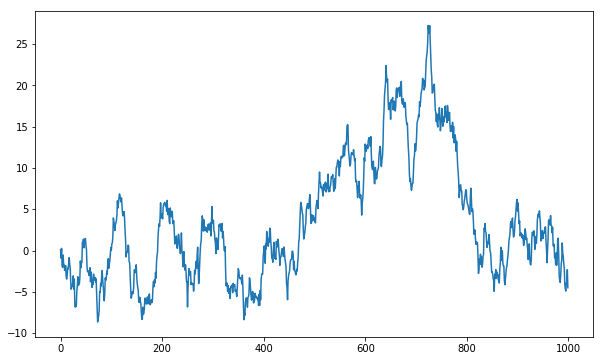

In [48]:
fig

Using `set_xticks` and `set_xticklabels` to change the x-axis ticks. The former instructs matplotlib where to place the ticks along the data range

In [49]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [51]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

`set_xlabel` gives a name to the x-axis and `set_title` set the subplot title

In [52]:
ax.set_xlabel('Stages')

In [53]:
ax.set_title('Example')

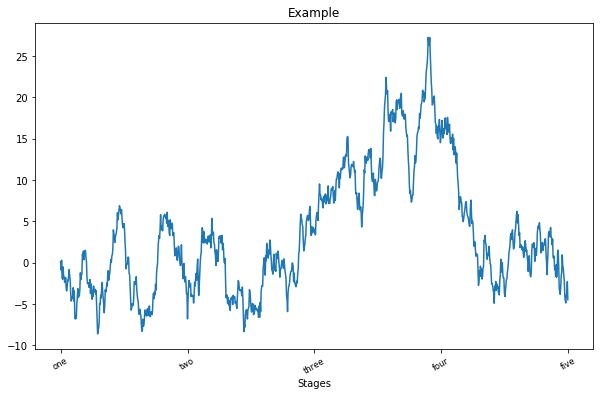

In [55]:
fig

The axes class has a `set` method that allows batch setting of plot properties

In [58]:
props = {
    'title': 'Title 1',
    'xlabel': 'Stages'
}
ax.set(**props)

[<matplotlib.text.Text at 0x10a7a7590>, <matplotlib.text.Text at 0x10a88d350>]

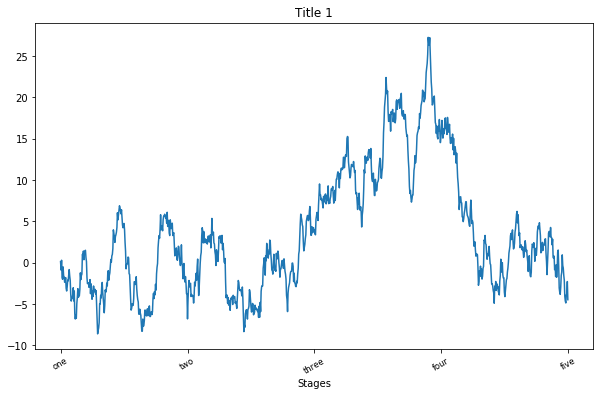

In [62]:
plt.show()

Adding legends
The easist way is to pass the `label` argument when adding each piece of the plot

In [82]:
from numpy.random import randn

In [83]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [84]:
ax.plot(randn(100).cumsum(), 'k', label='one')

In [85]:
ax.plot(randn(100).cumsum(), 'k--', label='two')

In [86]:
# ax.legend create legend for the subplot, plt.legent for the whole plot
ax.legend(loc='best')

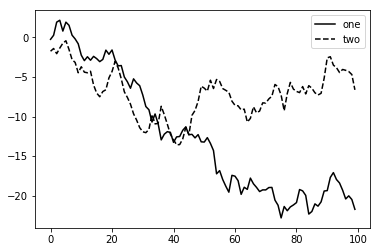

In [87]:
plt.show()

### 1.4 Annotations and Drawing on a Subplot

Adding annotations and text using the `text`, `arrow`, and `annotate` functions

`text` draws text at given coordinates (x, y) on the plot with optional custom styling:
```
ax.text(x, y, 'Hello World!',
        family='monospace', fontsize=10)
```

In [88]:
from datetime import datetime

In [89]:
import pandas as pd

In [126]:
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)

In [127]:
spx = data['SPX']

In [128]:
spx.plot(style='k-')

In [129]:
crisis_data = [
        (datetime(2007, 10, 11), 'Peak of bull market'),
        (datetime(2008, 3, 12), 'Bear Stearns Fails'),
        (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [130]:
for date, label in crisis_data:
    plt.annotate(label, xy=(date, spx.asof(date) + 75),
                 xytext=(date, spx.asof(date) + 225),
                 arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                 headlength=4),
                 horizontalalignment='left', verticalalignment='top')

In [131]:
plt.xlim(('1/1/2007', '1/1/2011'))
plt.ylim((600, 1800))

(600, 1800)

In [132]:
plt.title('Important dates in the 2008-2009 financial crisis')

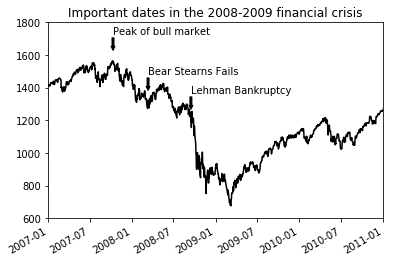

In [133]:
plt.show()

Using axes object

In [124]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
    # Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

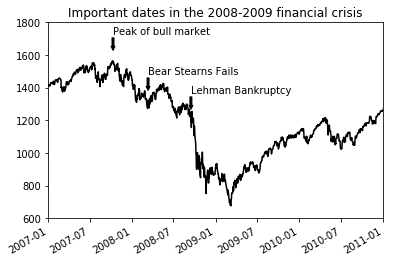

In [125]:
plt.show()

Full set of shapes that can be drawed is located in `matplotlib.patches`. plt also has `Rectangle` and `Circle` methods

To add a shape to a plot, you create the patch object `shp` and add it to a subplot by calling `ax.add_patch(shp)`

In [156]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

In [157]:
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

In [158]:
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

In [159]:
# plt.gca() gets the current polar axes on the figure
# Creates a new one if not existed
plt.gca().add_patch(rect)
plt.gca().add_patch(circ)
plt.gca().add_patch(pgon)

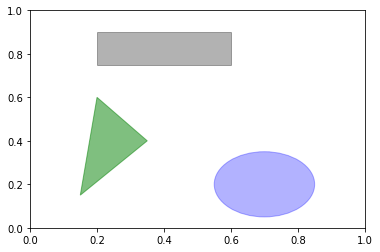

In [160]:
plt.show()

### 1.5 Saving Plots to File

Save the active figure to file using `plt.savefig` that is equivalent to the figure object's `savefig` method.

```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

<img src='img/9_1_1.png'>

`savefig` doesn't have to write to disk; it can also write to any file-like object

```
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plt_data = buffer.getvalue()
```

### 1.6 matplotlib Configuration

In [5]:
?plt.rc

Using `plt.rc` method to modify the configuration

In [48]:
plt.rc('figure', figsize=(10, 6))

In [49]:
plt.rcParams['figure.figsize'] = (10, 6)

The first argument to `rc` is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', etc. A batch setting way:

In [10]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 9}
plt.rc('font', **font_options)

## 2 Plotting with pandas and seaborn

- pandas has built0in methods that simplify creating visualizations from DataFrame and Series objects.
- `seaborn` simplifies creating many common visualization types. Importing seaborn modifies the default matplotlib color schemes and plot styles to imporve readibility and aesthetics.

### 2.1 Line Plots

In [11]:
import pandas as pd

Series and DataFrame each have a `plot` method for making some basic plot types. By default, plot() makes line plots

In [19]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [20]:
s.plot()

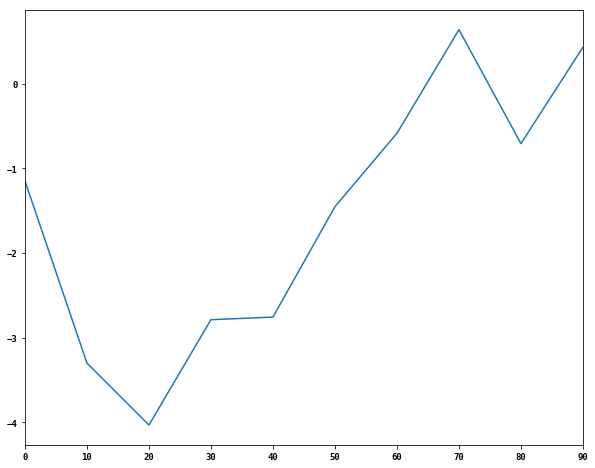

In [21]:
plt.show()

In [22]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [23]:
df.plot()

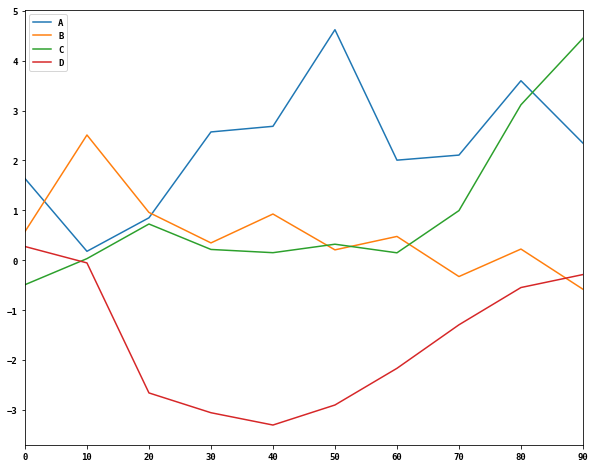

In [24]:
plt.show()

<img src='img/9_2_1.png'>

<img src='img/9_2_2.png'>

### 2.2 Bar Plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots.

In [37]:
fig, axes = plt.subplots(2, 1)

In [38]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [39]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [40]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

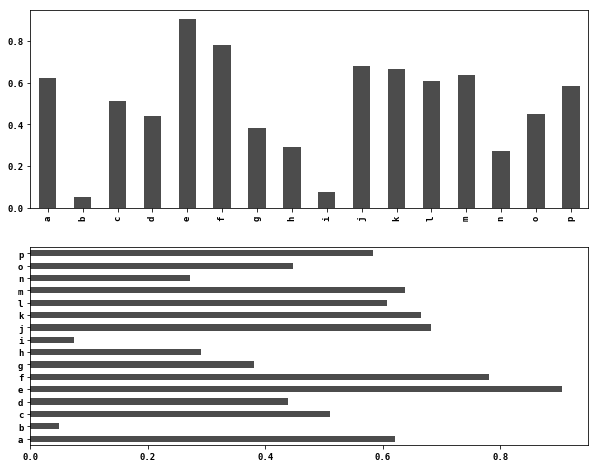

In [41]:
plt.show()

With a DataFrame, bar plots group the values in each row together in a group in bars.

In [54]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [55]:
df

Genus,A,B,C,D
one,0.414717,0.470699,0.764398,0.769576
two,0.260717,0.279572,0.351252,0.110385
three,0.499209,0.982882,0.020796,0.610647
four,0.848588,0.963842,0.152877,0.732638
five,0.462726,0.097493,0.106830,0.175853
six,0.745323,0.742824,0.683011,0.057592


In [56]:
df.plot.bar()

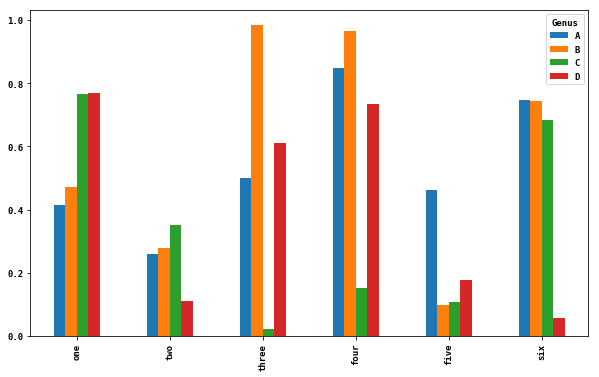

In [57]:
plt.show()

Stacked bar plots

In [60]:
df.plot.barh(stacked=True, alpha=0.5)

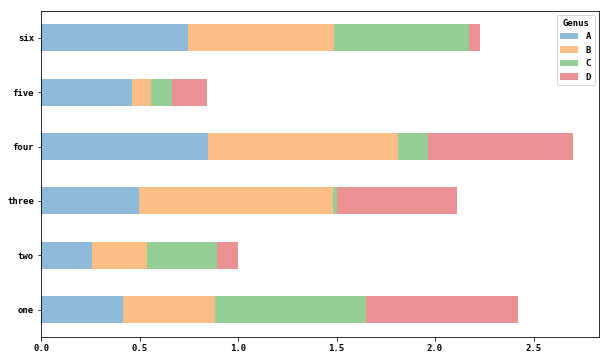

In [61]:
plt.show()

Making a stacked bar plot showing the percentage of data points for each party size on each day.

In [24]:
tips = pd.read_csv('examples/tips.csv')

In [88]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [89]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [90]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [91]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [96]:
party_pct = party_counts.div(party_counts.sum(1), axis=0)

In [98]:
party_pct

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [99]:
party_pct.plot.bar()

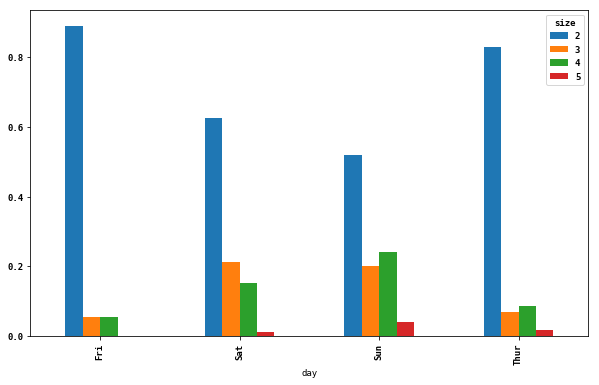

In [100]:
plt.show()

Using the `seaborn` package can make plotting aggregation or summarization data much simpler

In [25]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [102]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [105]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

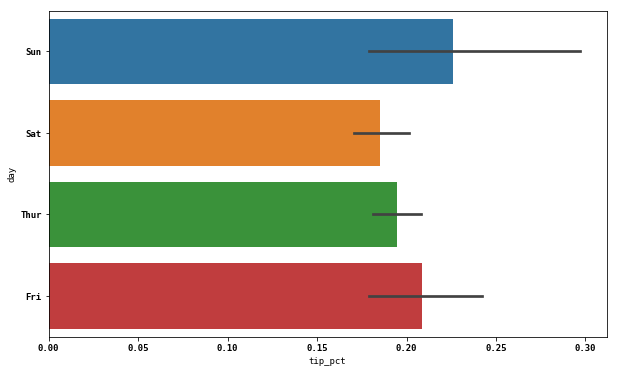

In [106]:
plt.show()

Because there are multiple observations for each value in the day, the bars are the average value of tip_pct. The black lines drawn on the bars represent the 95% confidence interval

seaborn has a hue option that enables us to split by an additional categorical value

In [111]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

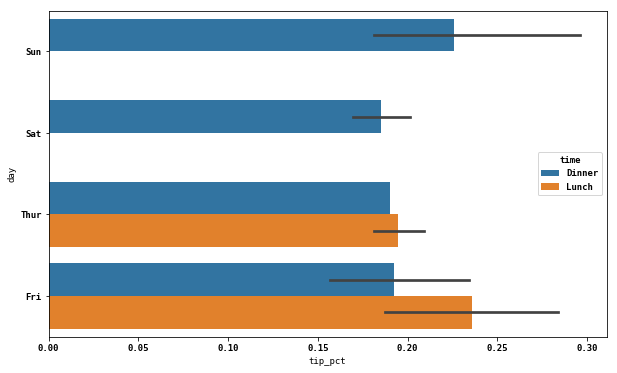

In [112]:
plt.show()

The plot appearances can be switched by ussing seaborn.set

In [119]:
sns.set(style="whitegrid")

In [120]:
sns.set(style=None)

### 2.3 Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted

In [121]:
tips['tip_pct'].plot.hist(bins=50)

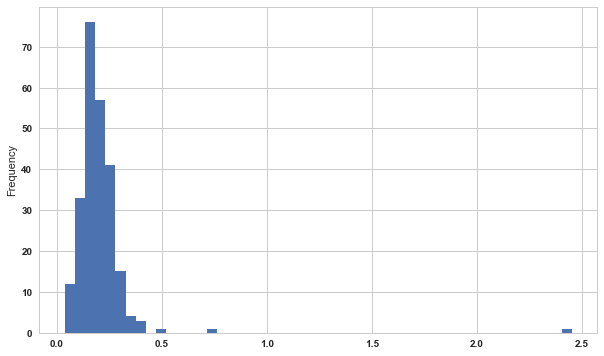

In [122]:
plt.show()

***Density plot*** is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of "kernels"--that is, simpler distributions like the normal distribution. Thus, density plots are known as kernel density estimate (KDE) plots. Using `plot.kde` makes a density plot using the conventional mixture-of-normals estimate

In [123]:
tips['tip_pct'].plot.density()

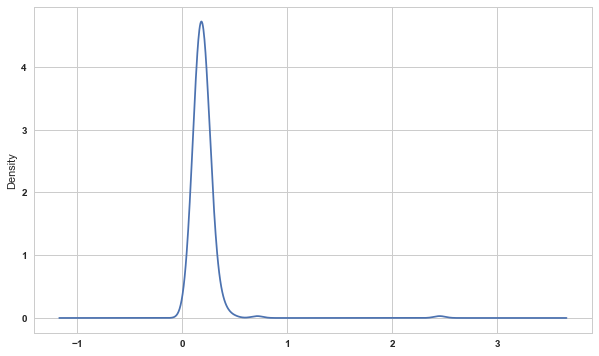

In [124]:
plt.show()

Seaborn's `distplot` method can plot both a histogram and a continuous density estimate simulation.

e.g. A bimodal distribution consisting of draws from two different standard normal distributions

In [127]:
comp1 = np.random.normal(0, 1, size=200)

In [128]:
comp2 = np.random.normal(10, 2, size=200)

In [129]:
values = pd.Series(np.concatenate([comp1, comp2]))

In [133]:
sns.distplot(values, bins=100, color='k')

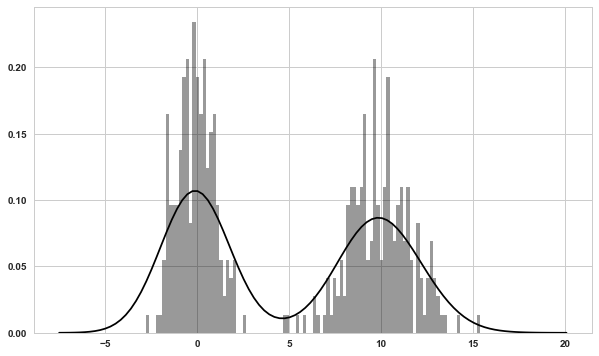

In [134]:
plt.show()

### 2.4 Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

In [5]:
macro = pd.read_csv('examples/macrodata.csv')

In [6]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [12]:
trans_data = np.log(data).diff().dropna()

In [13]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Seaborns's `regplot` method makes a scatter plot and fits a linear regression line

In [19]:
sns.regplot('m1', 'unemp', data=trans_data)

In [20]:
plt.title('Change in log %s versus log %s' % ('m1', 'unep'))

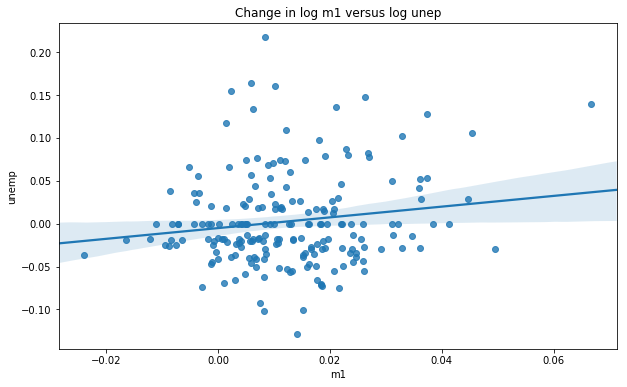

In [21]:
plt.show()

Seaborn's `pairplot` function creates a scatter plot matrix between every two variables pairs of dataset and place histograms or density estimates of each variable along the diagonel

In [22]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

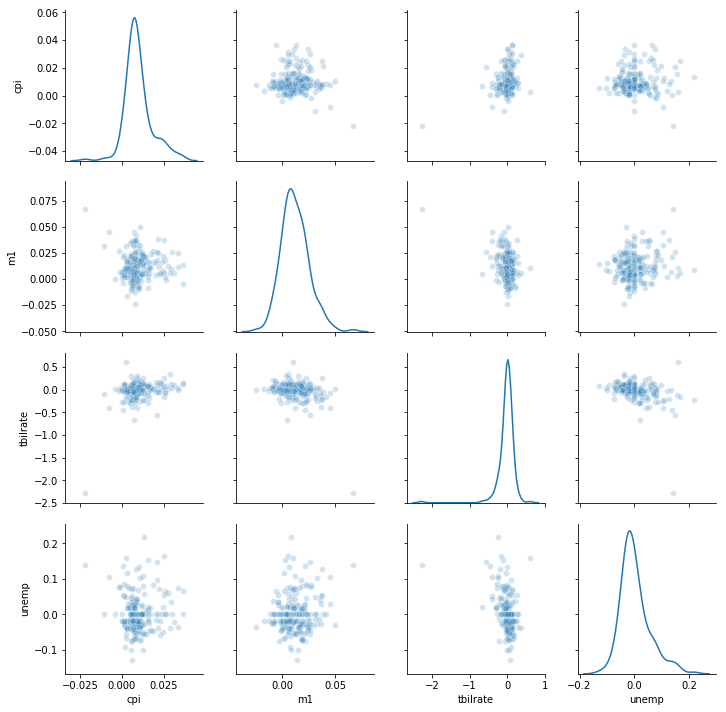

In [23]:
plt.show()

The `plot_kws` argument enables us to pass down configuration options the the individual plotting calls on the off-diagonal elements

### 2.5 Facet Grids and Categorical Data

Using facet grid to visualize data with many categorical variables. Seaborn's `factorplot` functin

In [26]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar',
               data=tips[tips.tip_pct < 1])

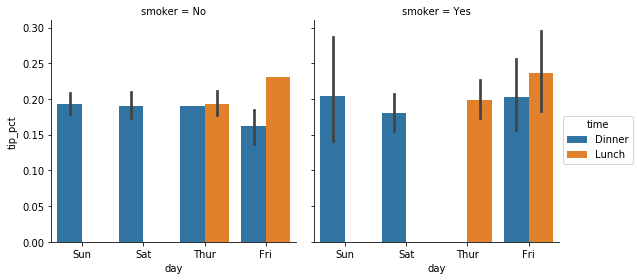

In [27]:
plt.show()

Instead of grouping by 'time' by using `hue` within a facet, we can also expand the facet grid by adding one row per `time` value

In [28]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

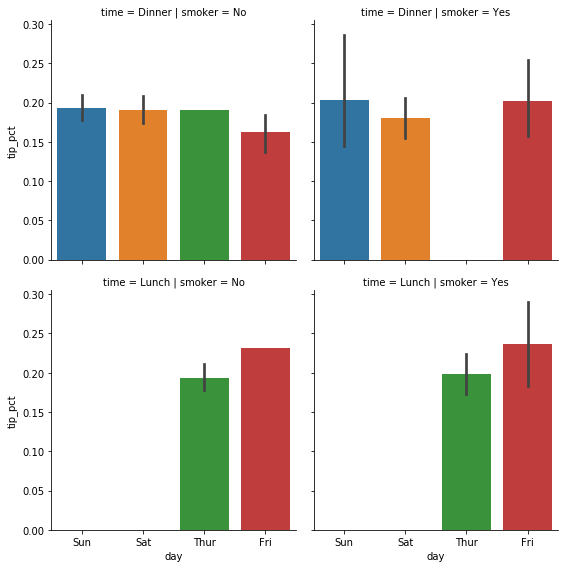

In [29]:
plt.show()

Using `factorplot` to plot box plots

In [43]:
sns.factorplot(x='day', y='tip_pct', kind='box', 
               data=tips[tips.tip_pct < 0.5], orient='v')

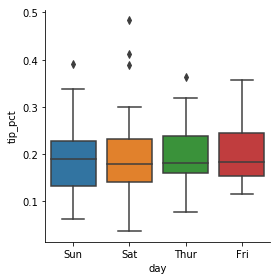

In [45]:
plt.show()

Can create facet grid using the more general `seaborn.FacetGrid` class

## 3 Other Python Visualization Tools

`Bokeh` and `Plotly` are used to create interactive graphics for publication on web